In [ ]:
pip install kserve

In [3]:
from kserve import RESTConfig, InferenceRESTClient, InferRequest, InferInput
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from random import randrange
import numpy as np
import os
import json
import requests

In [ ]:
# Download dataset
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

In [5]:
%%sh
unzip -q dogImages.zip
mv dogImages dog-breeds-dataset


In [4]:
# Dataset
ds_dog_breeds_path = "./dog-breeds-dataset"
test_ds_dog_breeds_path = os.path.join(ds_dog_breeds_path, "test")
ds_dog_breeds = datasets.ImageFolder(test_ds_dog_breeds_path)
dog_breeds_classes = ds_dog_breeds.find_classes(test_ds_dog_breeds_path)[0]

print(f"Classes dog_breeds_classifier: {dog_breeds_classes}")

Classes dog_breeds_classifier: ['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog', '044.Ca

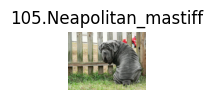

In [11]:
# Show sample image
fig = plt.figure(figsize=(1, 1))
sample_idx = randrange(len(ds_dog_breeds))

img, label = ds_dog_breeds[sample_idx]
fig.add_subplot(1, 1, 1)

plt.title(dog_breeds_classes[label])
plt.axis("off")
plt.imshow(img)
plt.show()

In [12]:
img_array = np.array(img.convert('RGB'))

if img_array.ndim == 3:
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
print(img_array.shape)

(1, 768, 1024, 3)


In [29]:
# Inference
model_name = "dog-breeds-classifier"
request = InferRequest(
    model_name=model_name,
    infer_inputs=[
        InferInput(
            name="data",
            shape=list(img_array.shape),
            datatype="FP32",
            data=img_array.tolist()
        )
    ],
)

cfg = RESTConfig(protocol="v2", verify=False)
client = InferenceRESTClient(cfg)
# To get base_url: 
# oc get isvc dog-breeds-classifier -n modelserving-demo -o jsonpath='{.status.url}'
base_url = "https://dog-breeds-classifier-modelserving-demo.apps.rosa.n1t3u2f3w1s0b1d.kkw2.p3.openshiftapps.com"

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [31]:
infer_response = await client.infer(
    base_url,
    request,
    request.model_name,
    is_graph_endpoint=False
)
det_class = dog_breeds_classes[np.argmax(infer_response.outputs[0].data)]
# print("Raw response: ", infer_response)
print(f"Detected class: {det_class}")

Detected class: 105.Neapolitan_mastiff
